<a href="https://colab.research.google.com/github/cristianmunoz1/Intro_ML_project/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto final Modelos II
## Ana Isabel Patiño Osorio
## Cristian Daniel Muñoz Botero



#### Instalación de kaggle

Se instala kaggle en el entorno virtual, se le dan permisos al token de kaggle

In [1]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#### Importaciones de librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#### Importe del dataset de Kaggle y extracción del CSV

In [3]:
!kaggle datasets download -d rabieelkharoua/predict-pet-adoption-status-dataset
!unzip *.zip

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/43.6k [00:00<?, ?B/s]
100% 43.6k/43.6k [00:00<00:00, 130MB/s]
Archive:  predict-pet-adoption-status-dataset.zip
  inflating: pet_adoption_data.csv   


In [4]:
#
df = pd.read_csv("pet_adoption_data.csv")
print(df.head())

   PetID PetType             Breed  AgeMonths   Color    Size   WeightKg  \
0    500    Bird          Parakeet        131  Orange   Large   5.039768   
1    501  Rabbit            Rabbit         73   White   Large  16.086727   
2    502     Dog  Golden Retriever        136  Orange  Medium   2.076286   
3    503    Bird          Parakeet         97   White   Small   3.339423   
4    504  Rabbit            Rabbit        123    Gray   Large  20.498100   

   Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0           1                0                 27          140              0   
1           0                0                  8          235              0   
2           0                0                 85          385              0   
3           0                0                 61          217              1   
4           0                0                 28           14              1   

   AdoptionLikelihood  
0                   0  
1       

In [5]:
df.columns

Index(['PetID', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood'],
      dtype='object')

In [6]:
# Resúmen de los tipos de datos del df
df.dtypes

,0
PetID,int64
PetType,object
Breed,object
AgeMonths,int64
Color,object
Size,object
WeightKg,float64
Vaccinated,int64
HealthCondition,int64
TimeInShelterDays,int64


In [7]:
df[['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']].describe()

,AgeMonths,WeightKg,TimeInShelterDays,AdoptionFee
count,2007.000000,2007.000000,2007.000000,2007.000000
mean,92.279522,15.705776,43.974091,249.142003
std,52.148363,8.327749,25.740253,142.887040
min,1.000000,1.018198,1.000000,0.000000
25%,48.000000,8.730396,21.000000,127.000000
50%,94.000000,15.925416,45.000000,242.000000
75%,138.000000,22.737180,66.000000,375.000000
max,179.000000,29.995628,89.000000,499.000000


In [8]:
df_null = df.isnull()
df_na = df.isna()
conteo_faltantes = df_null.sum(axis=0)
conteo_na = df_na.sum(axis = 0)

In [9]:
conteo_faltantes

,0
PetID,0
PetType,0
Breed,0
AgeMonths,0
Color,0
Size,0
WeightKg,0
Vaccinated,0
HealthCondition,0
TimeInShelterDays,0


In [10]:
conteo_na

,0
PetID,0
PetType,0
Breed,0
AgeMonths,0
Color,0
Size,0
WeightKg,0
Vaccinated,0
HealthCondition,0
TimeInShelterDays,0


In [11]:
print("Valores únicos en PetType: ", np.unique(df.PetType))
print("Valores únicos en Breed: ", np.unique(df.Breed))
print("Valores únicos en AgeMonths: ", np.unique(df.AgeMonths))
print("Valores únicos en Color: ", np.unique(df.Color))
print("Valores únicos en Size: ", np.unique(df.Size))
print("Valores únicos en WeightKg: ", np.unique(df.WeightKg))
print("Valores únicos en Vaccinated: ", np.unique(df.Vaccinated))
print("Valores únicos en HealthCondition: ", np.unique(df.HealthCondition))
print("Valores únicos en TimeInShelterDays: ", np.unique(df.TimeInShelterDays))
print("Valores únicos en AdoptionFee: ", np.unique(df.AdoptionFee))
print("Valores únicos en PreviousOwner: ", np.unique(df.PreviousOwner))
print("Valores únicos en AdoptionLikelihood: ", np.unique(df.AdoptionLikelihood))

Valores únicos en PetType:  ['Bird' 'Cat' 'Dog' 'Rabbit']
Valores únicos en Breed:  ['Golden Retriever' 'Labrador' 'Parakeet' 'Persian' 'Poodle' 'Rabbit'
 'Siamese']
Valores únicos en AgeMonths:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
Valores únicos en Color:  ['Black' 'Brown' 'Gray' 'Orange' 'White']
Valores ú

## Gráfica de los datos

### Datos categóricos


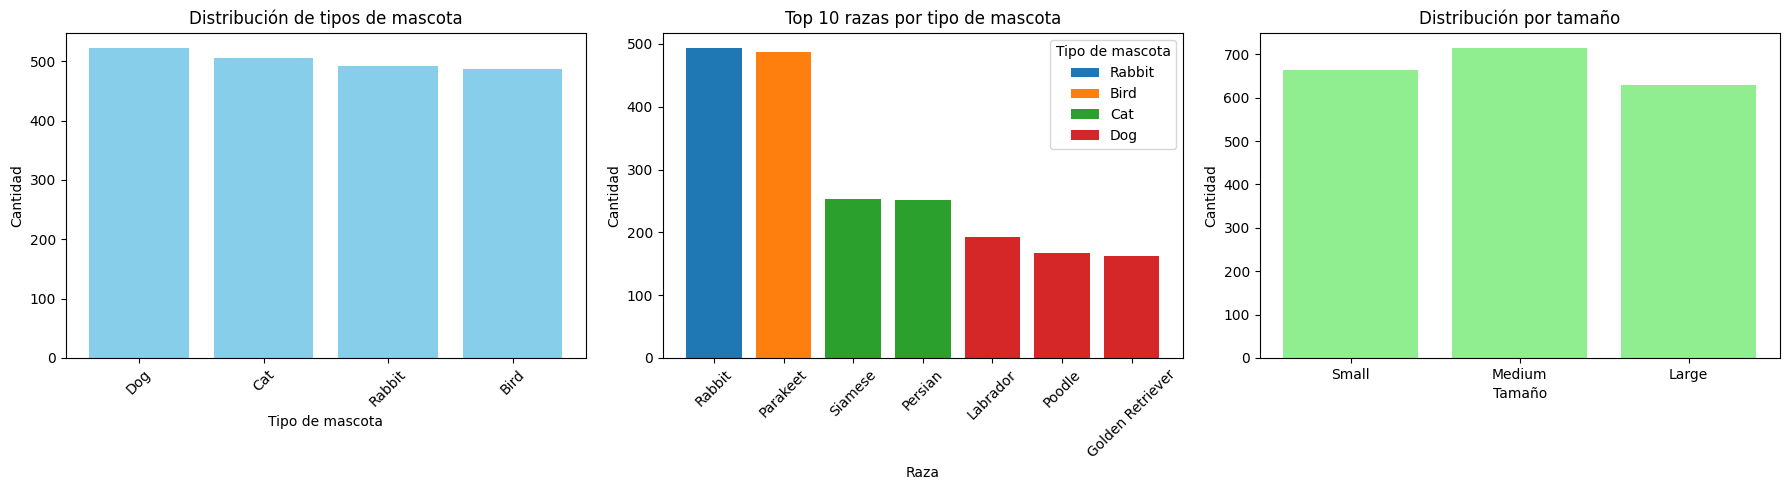

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

pet_counts = df['PetType'].value_counts()
axes[0].bar(pet_counts.index, pet_counts.values, color='skyblue')
axes[0].set_title('Distribución de tipos de mascota')
axes[0].set_xlabel('Tipo de mascota')
axes[0].set_ylabel('Cantidad')
axes[0].tick_params(axis='x', rotation=45)

breed_counts = df.groupby(['PetType', 'Breed']).size().reset_index(name='Count')
top_breeds = breed_counts.sort_values('Count', ascending=False).head(10)

for pet in top_breeds['PetType'].unique():
    subset = top_breeds[top_breeds['PetType'] == pet]
    axes[1].bar(subset['Breed'], subset['Count'], label=pet)

axes[1].set_title('Top 10 razas por tipo de mascota')
axes[1].set_xlabel('Raza')
axes[1].set_ylabel('Cantidad')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Tipo de mascota')

size_order = ['Small', 'Medium', 'Large']
size_counts = df['Size'].value_counts().reindex(size_order)
axes[2].bar(size_counts.index, size_counts.values, color='lightgreen')
axes[2].set_title('Distribución por tamaño')
axes[2].set_xlabel('Tamaño')
axes[2].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()


### Datos numéricos

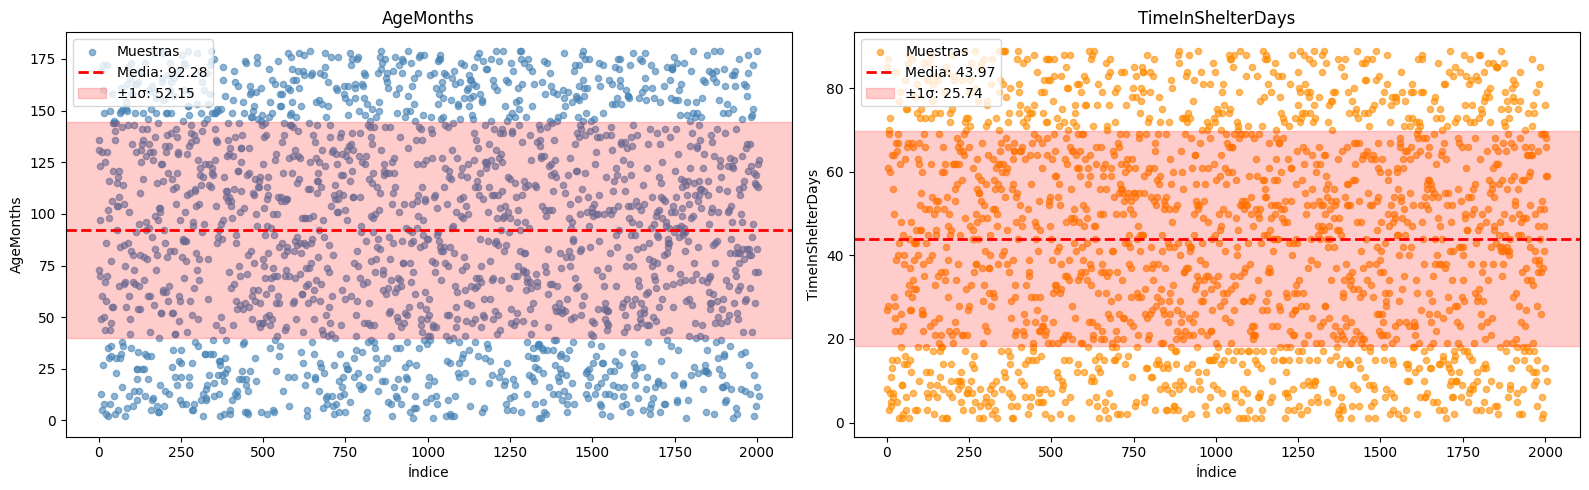

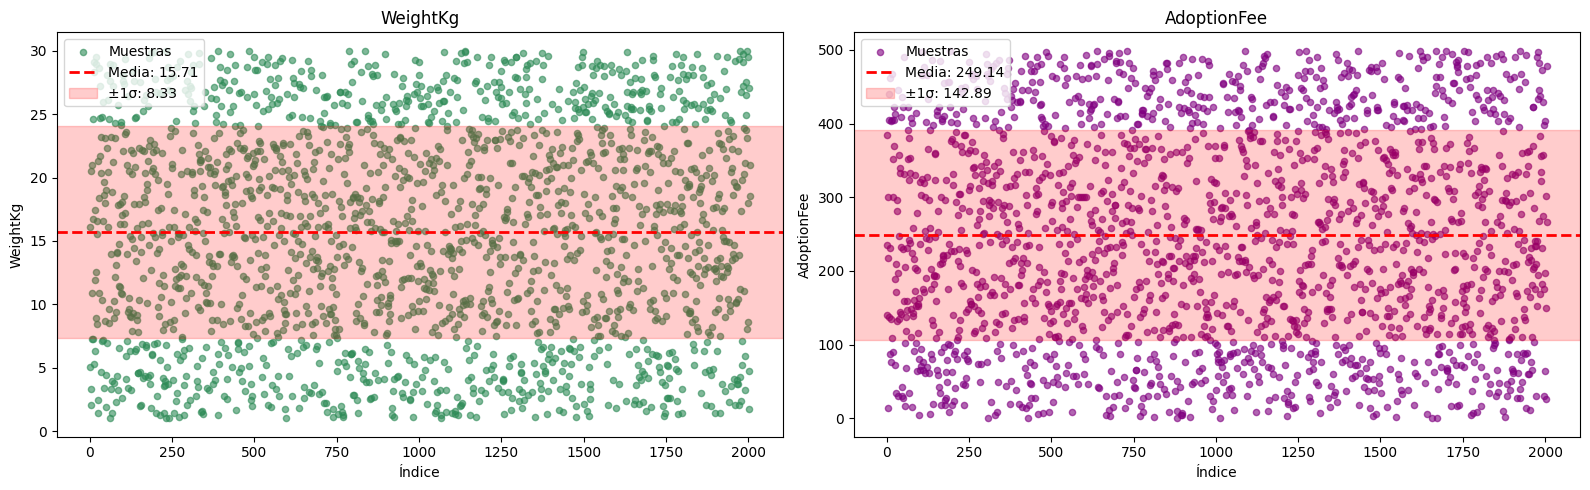

In [13]:
def plot_sample_line(ax, data, label, color='dodgerblue'):
  y = data
  x = y.index
  ax.scatter(x, y, alpha=0.6, color=color, s=20, label='Muestras')

  mean = y.mean()
  std = y.std()

  ax.axhline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean:.2f}')
  ax.axhspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1σ: {std:.2f}')

  ax.set_title(label)
  ax.set_xlabel('Índice')
  ax.set_ylabel(label)
  ax.legend()


fig1, axes1 = plt.subplots(1, 2, figsize=(16, 5))
plot_sample_line(axes1[0], df['AgeMonths'], 'AgeMonths', color='steelblue')
plot_sample_line(axes1[1], df['TimeInShelterDays'], 'TimeInShelterDays', color='darkorange')
plt.tight_layout()
plt.show()

fig2, axes2 = plt.subplots(1, 2, figsize=(16, 5))
plot_sample_line(axes2[0], df['WeightKg'], 'WeightKg', color='seagreen')
plot_sample_line(axes2[1], df['AdoptionFee'], 'AdoptionFee', color='purple')
plt.tight_layout()
plt.show()


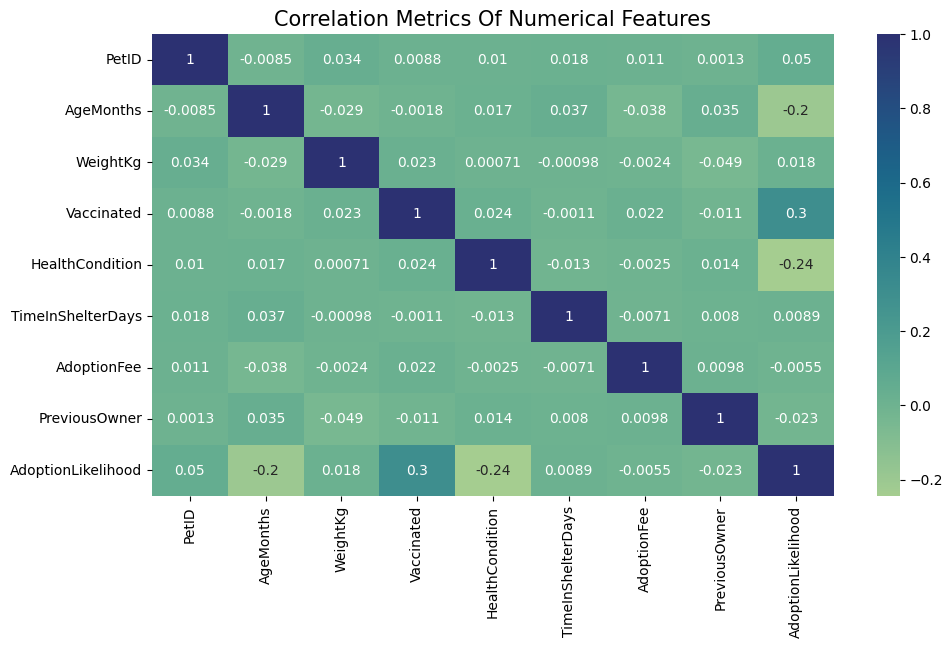

In [14]:
plt.figure(figsize=(11,6))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='crest')
plt.title('Correlation Metrics Of Numerical Features', fontsize=15)

plt.show()

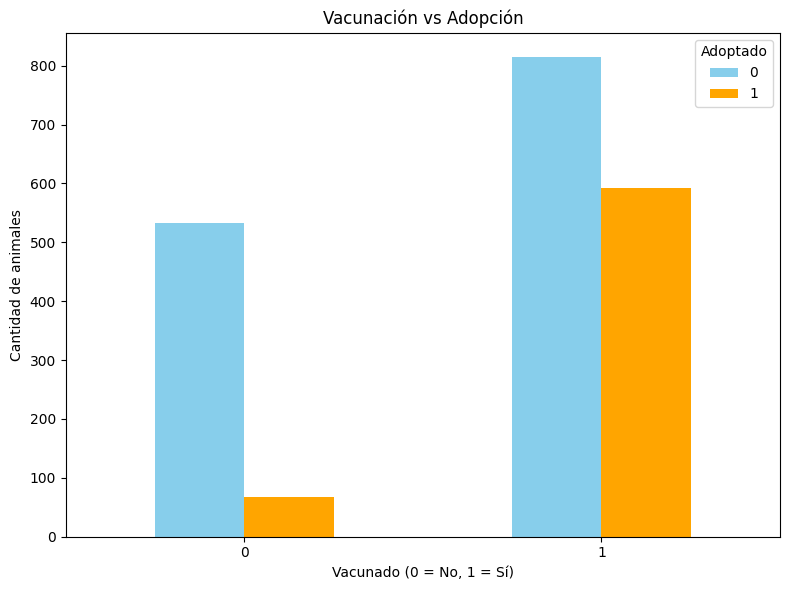

In [15]:
cross_tab = pd.crosstab(df['Vaccinated'], df['AdoptionLikelihood'])

cross_tab.plot(kind='bar', figsize=(8, 6), color = ['skyblue', 'orange'])
plt.title('Vacunación vs Adopción')
plt.xlabel('Vacunado (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de animales')
plt.xticks(rotation=0)
plt.legend(title='Adoptado')
plt.tight_layout()
plt.show()

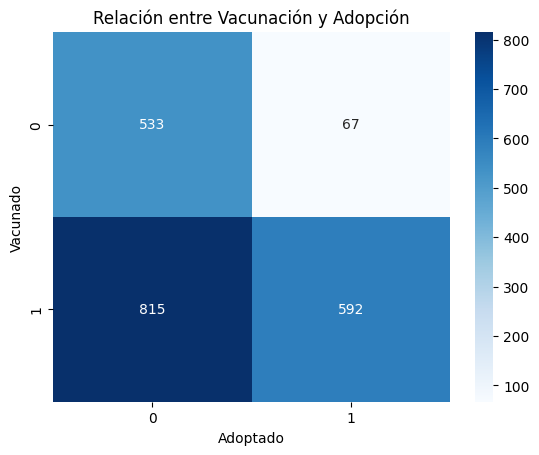

In [16]:
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Relación entre Vacunación y Adopción')
plt.xlabel('Adoptado')
plt.ylabel('Vacunado')
plt.show()

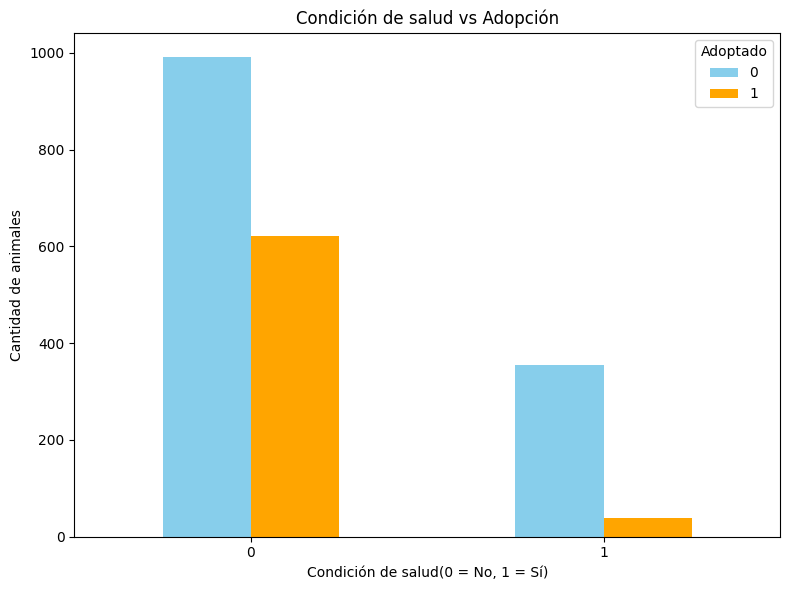

In [17]:
cross_tab = pd.crosstab(df['HealthCondition'], df['AdoptionLikelihood'])

cross_tab.plot(kind='bar', figsize=(8, 6), color = ['skyblue', 'orange'])
plt.title('Condición de salud vs Adopción')
plt.xlabel('Condición de salud(0 = No, 1 = Sí)')
plt.ylabel('Cantidad de animales')
plt.xticks(rotation=0)
plt.legend(title='Adoptado')
plt.tight_layout()
plt.show()

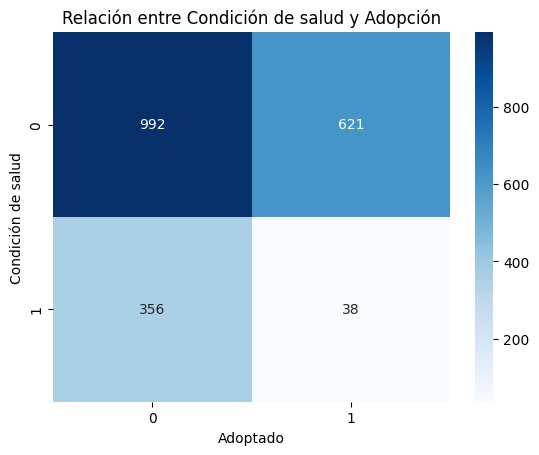

In [18]:
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Relación entre Condición de salud y Adopción')
plt.xlabel('Adoptado')
plt.ylabel('Condición de salud')
plt.show()

<ipython-input-19-b961f56f9642>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AdoptionLikelihood', y='AgeMonths', data=df, palette='Set2')


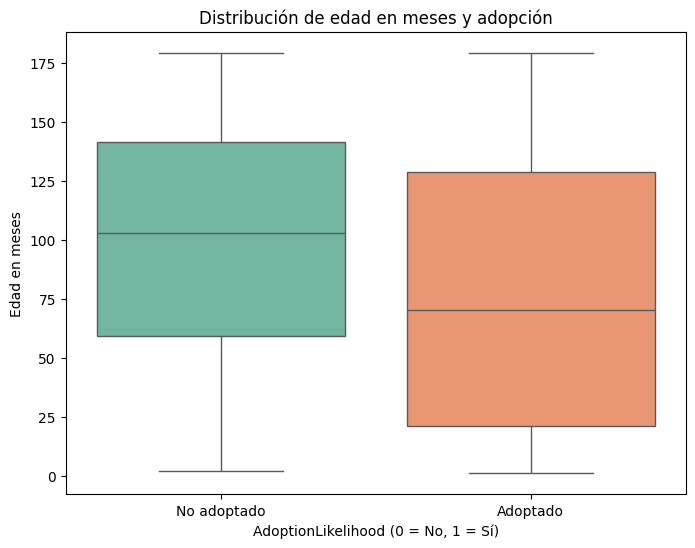

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x='AdoptionLikelihood', y='AgeMonths', data=df, palette='Set2')
plt.title('Distribución de edad en meses y adopción')
plt.xlabel('AdoptionLikelihood (0 = No, 1 = Sí)')
plt.ylabel('Edad en meses')
plt.xticks([0,1], ['No adoptado', 'Adoptado'])
plt.show()

### Datos que corresponden a booleanos

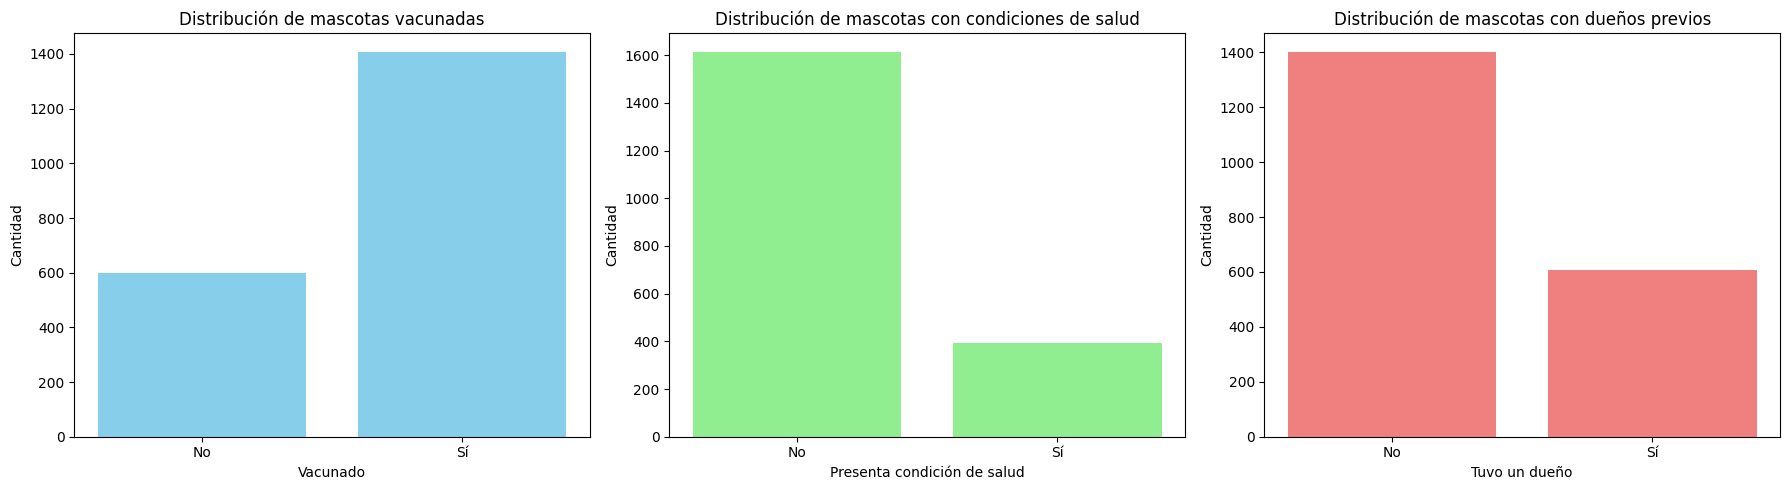

In [20]:
# Vacunados
vaccinated_counts = df['Vaccinated'].value_counts()
health_counts = df['HealthCondition'].value_counts()
previous_owner_counts = df['PreviousOwner'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Primer gráfico: Distribución de vacunados
axes[0].bar(vaccinated_counts.index, vaccinated_counts.values, color='skyblue')
axes[0].set_title('Distribución de mascotas vacunadas')
axes[0].set_xlabel('Vacunado')
axes[0].set_ylabel('Cantidad')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Sí'])  # Cambiar las etiquetas del eje X
axes[0].tick_params(axis='x', rotation=0)

# Segundo gráfico: Distribución de animales con condiciones de salud
axes[1].bar(health_counts.index, health_counts.values, color='lightgreen')
axes[1].set_title('Distribución de mascotas con condiciones de salud')
axes[1].set_xlabel('Presenta condición de salud')
axes[1].set_ylabel('Cantidad')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Sí'])  # Cambiar las etiquetas del eje X
axes[1].tick_params(axis='x', rotation=0)

# Tercer gráfico: Distribución de animales con dueños previos
axes[2].bar(previous_owner_counts.index, previous_owner_counts.values, color='lightcoral')
axes[2].set_title('Distribución de mascotas con dueños previos')
axes[2].set_xlabel('Tuvo un dueño')
axes[2].set_ylabel('Cantidad')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['No', 'Sí'])
axes[2].tick_params(axis='x', rotation=0)
plt.tight_layout()

plt.show()


### Normalización de datos

In [21]:
scaler = StandardScaler()
df['AgeMonths'] = scaler.fit_transform(df[['AgeMonths']])
df['WeightKg'] = scaler.fit_transform(df[['WeightKg']])
df['TimeInShelterDays'] = scaler.fit_transform(df[['TimeInShelterDays']])
df['AdoptionFee'] = scaler.fit_transform(df[['AdoptionFee']])
print(df.head)

<bound method NDFrame.head of       PetID PetType             Breed  AgeMonths   Color    Size  WeightKg  \
0       500    Bird          Parakeet   0.742691  Orange   Large -1.281098   
1       501  Rabbit            Rabbit  -0.369797   White   Large  0.045756   
2       502     Dog  Golden Retriever   0.838595  Orange  Medium -1.637043   
3       503    Bird          Parakeet   0.090543   White   Small -1.485328   
4       504  Rabbit            Rabbit   0.589244    Gray   Large  0.575608   
...     ...     ...               ...        ...     ...     ...       ...   
2002   2502     Dog            Poodle  -0.388978  Orange   Small  1.361243   
2003   2503  Rabbit            Rabbit   0.608425   Brown   Small -1.318671   
2004   2504  Rabbit            Rabbit   0.397436  Orange   Small -1.675202   
2005   2505     Dog          Labrador  -1.539828    Gray   Large  0.631278   
2006   2506  Rabbit            Rabbit   0.646787   White  Medium  0.337992   

      Vaccinated  HealthCondition

### Codificación de datos categóricos no ordinales

In [22]:
df['PetType'] = df['PetType'].astype("category")
df['Breed'] = df['Breed'].astype("category")
df['Color'] = df['Color'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PetID               2007 non-null   int64   
 1   PetType             2007 non-null   category
 2   Breed               2007 non-null   category
 3   AgeMonths           2007 non-null   float64 
 4   Color               2007 non-null   category
 5   Size                2007 non-null   object  
 6   WeightKg            2007 non-null   float64 
 7   Vaccinated          2007 non-null   int64   
 8   HealthCondition     2007 non-null   int64   
 9   TimeInShelterDays   2007 non-null   float64 
 10  AdoptionFee         2007 non-null   float64 
 11  PreviousOwner       2007 non-null   int64   
 12  AdoptionLikelihood  2007 non-null   int64   
dtypes: category(3), float64(4), int64(5), object(1)
memory usage: 163.6+ KB


In [23]:
codificador = OneHotEncoder()

cod_type = codificador.fit_transform(df[['PetType']])
cols_type = pd.DataFrame(cod_type.toarray(), columns=codificador.categories_)
df = pd.concat([df, cols_type], axis='columns')

cod_breed = codificador.fit_transform(df[['Breed']])
cols_breed = pd.DataFrame(cod_breed.toarray(), columns=codificador.categories_)
df = pd.concat([df, cols_breed], axis='columns')

cod_color = codificador.fit_transform(df[['Color']])
cols_color = pd.DataFrame(cod_color.toarray(), columns=codificador.categories_)
df = pd.concat([df, cols_color], axis='columns')

In [24]:
df.drop("PetID", axis='columns', inplace=True)
df.drop("PetType", axis='columns', inplace=True)
df.drop("Breed", axis='columns', inplace=True)
df.drop("Color", axis='columns', inplace=True)

In [25]:
df

,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,"(Bird,)",...,"(Parakeet,)","(Persian,)","(Poodle,)","(Rabbit,)","(Siamese,)","(Black,)","(Brown,)","(Gray,)","(Orange,)","(White,)"
0,0.742691,Large,-1.281098,1,0,-0.659602,-0.764025,0,0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.369797,Large,0.045756,0,0,-1.397929,-0.098998,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.838595,Medium,-1.637043,0,0,1.594240,0.951044,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.090543,Small,-1.485328,0,0,0.661616,-0.225003,1,0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.589244,Large,0.575608,0,0,-0.620743,-1.646060,1,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,-0.388978,Small,1.361243,1,0,0.855912,-1.562056,1,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2003,0.608425,Small,-1.318671,1,1,0.583897,-0.694022,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2004,0.397436,Small,-1.675202,1,0,0.933631,0.370021,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2005,-1.539828,Large,0.631278,1,0,0.583897,1.602070,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
df.columns

Index([          'AgeMonths',                'Size',            'WeightKg',
                'Vaccinated',     'HealthCondition',   'TimeInShelterDays',
               'AdoptionFee',       'PreviousOwner',  'AdoptionLikelihood',
                   ('Bird',),              ('Cat',),              ('Dog',),
                 ('Rabbit',), ('Golden Retriever',),         ('Labrador',),
               ('Parakeet',),          ('Persian',),           ('Poodle',),
                 ('Rabbit',),          ('Siamese',),            ('Black',),
                  ('Brown',),             ('Gray',),           ('Orange',),
                  ('White',)],
      dtype='object')

### Codificación de datos categóricos ordinales

In [27]:
size_categories = ["Small", "Medium", "Large"]
ordencoder = OrdinalEncoder(categories=[size_categories])

datos_ord = pd.DataFrame(ordencoder.fit_transform(df[['Size']]), columns=["Size"])
print(datos_ord)

df = pd.concat([df, datos_ord], axis = 'columns')

df

      Size
0      2.0
1      2.0
2      1.0
3      0.0
4      2.0
...    ...
2002   0.0
2003   0.0
2004   0.0
2005   2.0
2006   1.0

[2007 rows x 1 columns]


,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,"(Bird,)",...,"(Persian,)","(Poodle,)","(Rabbit,)","(Siamese,)","(Black,)","(Brown,)","(Gray,)","(Orange,)","(White,)",Size
0,0.742691,Large,-1.281098,1,0,-0.659602,-0.764025,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,-0.369797,Large,0.045756,0,0,-1.397929,-0.098998,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.838595,Medium,-1.637043,0,0,1.594240,0.951044,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.090543,Small,-1.485328,0,0,0.661616,-0.225003,1,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.589244,Large,0.575608,0,0,-0.620743,-1.646060,1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,-0.388978,Small,1.361243,1,0,0.855912,-1.562056,1,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2003,0.608425,Small,-1.318671,1,1,0.583897,-0.694022,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2004,0.397436,Small,-1.675202,1,0,0.933631,0.370021,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2005,-1.539828,Large,0.631278,1,0,0.583897,1.602070,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [28]:
df.drop("Size", axis='columns', inplace=True)

In [29]:
df

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,"(Bird,)","(Cat,)",...,"(Parakeet,)","(Persian,)","(Poodle,)","(Rabbit,)","(Siamese,)","(Black,)","(Brown,)","(Gray,)","(Orange,)","(White,)"
0,0.742691,-1.281098,1,0,-0.659602,-0.764025,0,0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.369797,0.045756,0,0,-1.397929,-0.098998,0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.838595,-1.637043,0,0,1.594240,0.951044,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.090543,-1.485328,0,0,0.661616,-0.225003,1,0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.589244,0.575608,0,0,-0.620743,-1.646060,1,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,-0.388978,1.361243,1,0,0.855912,-1.562056,1,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2003,0.608425,-1.318671,1,1,0.583897,-0.694022,0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2004,0.397436,-1.675202,1,0,0.933631,0.370021,0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2005,-1.539828,0.631278,1,0,0.583897,1.602070,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
